# Titanic Notebook

(Author: Jens Kohl, 11/2020. Update 05/2021)

In der Vorlesung haben wir bis jetzt den Workflow Use Case Data Science mit Excel verfolgt um einen guten Einstieg zu erhalten. 

Jetzt machen wir das ganze mit [Python](https://www.python.org/) und zwar in einer speziellen, extra für Data Science und Künstlichen Intelligenz gebauten und sehr populären Umgebung, einem sogenannten Jupyter-Notebook. 

Ziel des Notebooks ist das Veranschaulichen der Vorgehensweise Data Science. 

Wir machen dies anhand des Fallbeispiels Titanic, da es sich für Einführung in Data Science gut eignet. 

Wir werden auf einige stets auftretende Herausforderungen treffen, u.a.:
* fehlende Datenwerte
* Datenqualitätsprobleme.
* zusammenhängende Features
* wichtigere vs. nicht ganz so wichtige Eigenschaften
* anspruchsvolle Fragestellungen, die wir untersuchen wollen.

Für Titanic existieren sehr, sehr viele Notebooks; viele finden Sie bspw. auf [Kaggle](https://www.kaggle.com/c/titanic). 


Zur Veranschaulichung nochmal der Ablauf des schematischen Workflows für Data Science:

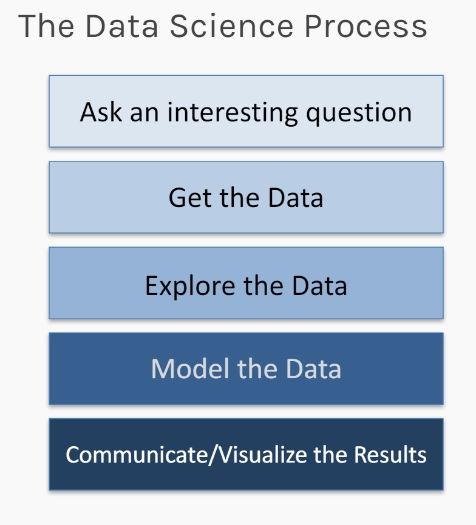

Quelle: Protopapas, Rader, Tanner, CS109 Data Science, 2019 [Link](https://github.com/Harvard-IACS/2019-CS109A/tree/master/content/lectures/lecture1/presentation)

## Schritt 1: Ask an interesting question

Der Beginn eines jeden Use Case Data Science ist die Festlegung, welche Fragestellungen wir untersuchen wollen.
Für das Titanic-Beispiel sind das beispielsweise folgende Fragen:
* Wie hoch war die Überlebenschance auf der Titanic?
* Welches Attribut ist der sicherste Indikator für Überleben?
* Wie hoch ist die Wahrscheinlichkeit für Überleben gegeben Frau und 2. Klasse? Und ist diese Überlebenswahrscheinlichkeit höher oder niedriger als die für einen Mann aus der 1. Klasse?
* Hätte es eine gemeinsame Zukunft für Kate und Leo gegeben: oder war es sicherer in der 1., 2. oder 3. Klasse zu reisen?
* Welche Kombination aus mehreren Features ergibt die höchste Chance für Überleben?

Bei den ersten beiden Fragen untersuchen wir **eine** definierte Variable, eine sogenannte **univariate Datenanalyse**. Die Variablen werden auch **Features** genannt. 
Damit kann man erste Untersuchungen anstellen, für die meisten interessanten Fragestellungen muß man sich jedoch mehr als ein Feature ansehen. 
Man spricht dann von **multivariater Datenanalyse**. 

## Schritt 2: Get the Data

Nachdem wir uns die zu untersuchenden Fragestellungen definiert haben, beschaffen wir uns die Daten.

Für das Laden und Auswerten der Daten gibt es in Python viele Programmbibliotheken, die uns die Detailarbeit abnehmen. 

Am Beginn jedes Notebooks laden wir diese Libraries, den Code sehen Sie in der grauen Zelle unter dieser Zeile. Lila markierter Text sind Standard-Befehle der Programmiersprache Python, Kommentare werden mit einer Raute eingeleitet.

Gute, kostenfreie Kurse in Python sind in den Literaturquellen in der Vorlesung angegeben; Sie benötigen diese aber eigentlich nicht für die Umfänge der Vorlesung.

In [1]:
import pandas as pd   # Importieren Standard-Library für das Bearbeiten und Laden von Daten ("Data Engineering").
import matplotlib.pyplot as plt # Standard-Library für das Plotten von Graphen.
import seaborn as sns   # verschönert Matplotlib-Graphiken
import numpy as np # Standard-Library für Rechnen

Für das Titanic-Beispiel sind die Daten, die wir bearbeiten wollen, als CSV (Comma Separated Values)-Datei gespeichert. Eine CSV-Datei ist eine Datei, in der die einzelnen Spalten bzw. Attribute oder Features durch Komma (oder manchmal Strichpunkt) voneinander getrennt sind. Dabei stellt dann jede Zeile ein Datenpunkt oder **Sample** dar. 

Nachdem wir die Standard-Libraries importiert haben, laden wir die CSV-Datei mit den Titanic-Passagieren und ihren Daten in einen Standard-Datentyp der [Pandas-Library](https://pandas.pydata.org/pandas-docs/stable/index.html), dem sogenannten Dataframe. 

Dataframes ist ein sehr häufig genutztes Datenformat in Data Science und AI. Sie können sich das als große Tabelle mit Spalten für die einzelnen Daten vorstellen.

Da wir alles in der Cloud machen, müssen wir die Titanic.csv noch organisieren. 
Dafür gibt es zwei Möglichkeiten:
* Hochladen von Festplatte
* Laden von einer anderen Internetadresse.

Beide Beispiele sind unten angefügt, das einfachere ist von der Webadresse.

In [ ]:
# Hochladen Titanic.csv über eine Eingabemaske von lokalem Rechner etc.
#from google.colab import files
#files.upload()
#titanic_df = pd.read_csv('titanic-raw.csv', sep=',')

In [2]:
# Lade csv Datei von einer Webpage. Die Webpage kann sich auch mal ändern....
url_webpage = 'https://hbiostat.org/data/repo/titanic3.csv' # wir speichern den Pfad für die Datei in der Variable url_webpage

# und rufen von Pandas die Funktion 'read_csv' auf, die die Datei unter der o.a. Webpage einliest.
titanic_df = pd.read_csv(url_webpage,
                         sep=',') # einzelnen Einträge in CSV sind durch , getrennt. Oft werden diese aber auch per ; getrennt

Nachdem wir die Datei geladen haben, schauen wir sie uns grob an um einen ersten Überblick zu erhalten und zu sehen, daß das Laden funktioniert hat.

In [3]:
titanic_df.info

<bound method DataFrame.info of       pclass  survived                                             name  \
0          1         1                    Allen, Miss. Elisabeth Walton   
1          1         1                   Allison, Master. Hudson Trevor   
2          1         0                     Allison, Miss. Helen Loraine   
3          1         0             Allison, Mr. Hudson Joshua Creighton   
4          1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1304       3         0                             Zabour, Miss. Hileni   
1305       3         0                            Zabour, Miss. Thamine   
1306       3         0                        Zakarian, Mr. Mapriededer   
1307       3         0                              Zakarian, Mr. Ortin   
1308       3         0                               Zimmerman, Mr. Leo   

         sex    age  sibsp  parch  ticket      fare    cabin embark

Wir sehen eine Übersicht  der Datei und Zusatzinfos. Die letzte Zeile sagt uns daß wir 1309 Zeilen Daten haben (also 1309 Passagiere) und in jeder Zeile 14 Spalten (also Attribute oder Features). Den Rest schauen wir uns im Folgenden genauer an.

## Schritt 3: Explore the Data

Nachdem wir die Daten geladen haben, schauen wir uns diese Daten jetzt an.

Wir werden in diesem längeren Abschnitt folgende Sachen machen:
1. Übersicht über Daten erhalten
2. Data management: Daten lesbarer machen, Daten bereinigen und aufbereiten
3. Daten explorieren per visueller Darstellung und versuchen, erste Muster zu erkennen

Man kann die Reihenfolge auch tauschen und erst Daten explorieren und dann die Qualität verbessern; viele machen auch beides gleichzeitig: das heißt, sobald verbessere Punkte durch Explorieren gefunden werden, wird dies gleich erledigt.

### Übersicht Daten

In [4]:
# wir schauen uns die ersten 10 Zeilen des Datasets an um ein Gefühl über die Daten und Spalten/ Features zu erhalten
titanic_df.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


Ein kurzer Blick auf die ersten zehn Zeilen zeigt uns schon einige Anhaltspunkte:
* Jede Zeile stellt einen individuellen Passagier dar.
* Die Spalte ganz links ist durchlaufend nummeriert ohne Name. Hier ist die eindeutige Nummer für jeden Passagier, der sogenannte **Index** (in Datenbanken auch primary key genannt).
* Spalte 'survived' ist für unsere anfängliche Fragestellungen die einzige ausschlaggebende Zielvariable, das sogenannte **Label**. 
In Machine Learning ist das die Variable, die wir vorhersagen wollen.
* 'Survived' ist das einizge **Label**, das heißt alle anderen Spalten sind beschreibende Eigenschaften, sogenannte **Features**. 
* Einige Features haben sprechende Namen, andere wie sibsp, parch oder pclass eher nicht. Diese sollten wir der Lesbarkeit wegen umbennen. Im Machine Learning müssen Sie das nicht machen, dem Computer ist der Name des Features egal.
* Im Feature cabin gibt es für Familie Allison in Zeile 1-4 jeweils 2 Werte. Eigentlich sollte jedes Feature, das wir für Datenanalyse nutzen, nur einen Wert haben.
* In Spalte Ticket haben wir Nummern, aber auch Kombination aus Text und Nummer. 
* Für einige Passagiere gibt es im Feature 'body' den Wert **NaN**. Das bedeutet Not a Number, also keine Zahl. Aber eigentlich fehlt hier komplett ein Wert.

In [5]:
titanic_df.describe(include='all') # Detailliertere Infos zu den Daten anzeigen durch den Parameter all

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000,745
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,27,NaN,369
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN,64
mean,2.294882,0.381971,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917,NaN
std,0.837836,0.486055,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922,NaN
min,1.000000,0.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000,NaN
50%,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000,NaN


Der Befehl describe zeigt uns eine erste statistische Auswertung des Datasets, die auch die sogenannte **Five-number summary** enthält und hilft, die Verteilung der Werte einer Spalte schnell einschätzen zu können. Dies betrifft:
* **min**: minimale Wert in einer Spalte/ für ein Feature.
* **50% quantil**, der Median. Der Median ist ein Wert, der genau in der Mitte der Daten liegt, d.h. er teilt die Daten der Spalte in 2 genau gleich große Untermengen (Beispiel: für die Menge 1, 3, 4, 10, 15, 20, 40 ist 10 der Median, da links und rechts jeweils 3 Elemente sind). Bei einer Menge mit einer geraden Anzahl werden die "beiden Mitten" durch 2 geteilt und dieser Wert als Median genommen.
* **25% quantil**, das untere Quantil. Teilt die untere Teilmenge kleiner 50% wiederum in 2 gleich große Mengen. Wir erhalten die Zahl, die die untere Teilmenge geteilt hat. Diese Zahl ist somit größer als 25% der Daten (Beispiel: aus der oberen Menge erhalten wir 1, 3, 4. Somit ist 3 der Median der unteren Menge und dadurch das 25% Quantil der gesamten Menge).
* **75% quantil**, das obere Quantil. Teilt die obere Teilmenge wiederum in 2 gleich große Mengen. Wir erhalten einen Wert, der größer ist als 75% der Werte.
* **max**: der maximale Wert in einer Spalte.

Weitere statistisch interessante Größen sind:
* **count**: Anzahl Elemente je Spalte. Gibt uns Information, ob und wie viele Elemente in einer Spalte fehlen (falls die Anzahl kleiner als die Anzahl der gesamten Zahl der Zeilen ist).
* **unique**: Anzahl der eindeutigen Elemente. Je mehr eindeutige Werte für eine Spalte, umso weniger eignet sich die Spalte als Label und umso unübersichtlicher sind visuelle Auswertungen.
* **top**: der häufigste Wert in einer Spalte. Dies wird **Mode** genannt.
* **mean**: der Durchschnittswert der Spalte. Bitte nicht mean mit median verwechseln: mean ist das arithmetische Mittel, also die Summe aller Werte geteilt durch die Anzahl der Werte. Median ist der Wert, der genau in der Mitte liegt. 
* **Std**: die Standardabweichung. Diese gibt die Abweichung von Werten vom Durchschnittswert ab. Je höher der Wert, desto weiter verteilt und unterschiedlicher sind die Werte.
* **Range**/Reichweite: die müssen wir selber berechnen aus der Differenz zwischen max und min-Wert. Sie gibt uns Information, wie weit die einzelnen Werte einer Spalte auseinander liegen. 

Angewandt auf das Titanic-Beispiel sehen wir aus dieser Auswertung folgende Punkte:
* Zeile count: wir haben für pclass, survived, name, sex, sibsp und parch für jeden Passagier einen Wert. Bei Boat und Cabin für kaum einen Passagier einen Wert. Das heißt, diese beiden Variablen werden sich - ohne daß wir da Arbeit hineinstecken- nicht für eine verläßliche Indikation bzgl. Überleben eignen.
* unique: 1307 Werte für Namen und 929 für Ticket sowie 2 für Geschlecht.
* Min: minimalster Wert einer Spalte, bspw. 0,17 Jahre altes Kind.
* Max: höchste Wert einer Spalte, also teuerstes Ticket war bei 512 Pfund.

Wieso sind so viele Einträge hier NaN? Weil für viele Passagiere keine Daten vorliegen.

### Data Management

Nachdem wir einen groben Überblick erhalten haben, fangen wir jetzt mit dem Data Management an. Wir werden 3 verschiedene Sachen machen:
1. Bessere Lesbarkeit Dataset. Das erleichtert uns das Arbeiten, dem Computer ist das gleich ;-).
2. Datenqualität verbessern, das sogenannte **Data Cleaning**. Wir werden das nur kurz streifen. Vor allem das Thema Umgang mit fehlenden Daten, **Data Imputing** ist ein sehr umfangreiches Thema, bei dem neben viel Erfahrung auch viel trial-and-error ist. 
3. Neue Spalten bauen, die uns bei der Beantwortung der Fragestellungen helfen sollen. Dies wird **Feature Engineering** genannt.


#### Verbesserung Lesbarkeit

In [6]:
# Änderung Spaltennamen pclass, sibsp, parch und home.dest in sprechendere Namen.
# Bitte unbedingt merken: Python unterscheidet zwischen Groß- und Kleinschreibung!!!
titanic_df = titanic_df.rename({
    'pclass' : 'PassengerClass',
    'sibsp' : 'SiblingSpousesPresent',
    'parch' : 'ParentsChildrenPresent',
    'home.dest' : 'HomeDestination'
    }, axis='columns') # damit sagen wir der Programmiersprache daß wir die Spalten ändern wollen

Jetzt bearbeiten wir die Spalte "Embarked", also der Zusteigeort zum Schiff. Da es dort auch einige fehlende Werte gab (siehe oben), ersetzen wir diese zuerst mit dem Wert 0. 
Anschließend ersetzen wir die Abkürzungen für den Zusteigeort durch den ausgeschriebenen Ort

In [7]:
titanic_df['embarked'] = titanic_df['embarked'].fillna(value='0') # mache nan- und undef-Werte zu 0 (noch als Zeichenkette 0. Umwandlung in Ganzzahl kommt später)
# Feature Embarked hat die Abkürzung S für Southampton, C für Cherbourg und Q für Queenstown. Wir nehmen lieber die vollständigen Namen
# Befehl sagt wörtlich: Lokalisiere jede Zeile und vergleiche für jede Zeile ob in der Spalte 'embarked' der Wert C steht. Falls ja, dann ersetze nur in dieser Spalte das C durch Cherbourg 
titanic_df.loc[titanic_df['embarked'] == 'C', 'embarked'] = 'Cherbourg'
titanic_df.loc[titanic_df['embarked'] == 'S', 'embarked'] = 'Southampton' # das gleiche für Southampton statt S
titanic_df.loc[titanic_df['embarked'] == 'Q', 'embarked'] = 'Queenstown' # und Queenstown statt Q
titanic_df.loc[titanic_df['embarked'] == '0', 'embarked'] = 'UNDEFINED' # und 0-Werte als undefined

#### Data Engineering

Und jetzt zum Data Engineering. 
Wir schauen uns im Detail folgende Themen an:
* den Datentyp jeder Spalte. 
* die Zielvariable muss für Machine Learning entweder eine Zahl oder eine Boolesche Variable (wahr/falsch) sein. Für unsere Datenanalysen könnten wir aber die Zielvariable als Text lassen.
* Umwandeln des Datentyps der Features, falls notwendig. PassengerClass und Embarked bieten sich als **kategorische** Variablen an. Das sind Variablen, die nur einen Wert aus einer definierten Menge haben können (bspw. Farben: rot, grün, blau, ...).
* Statistische Daten zu jeder Spalte inkl. undefinierter Werte.
* Beseitigen undefinierter/ NaN-Werte. Zuerst schauen wir uns an, wie viele NaN oder andere undefinierte Werte es je Spalte gibt. In unserem Beispiel nehmen wir für die Spalte Boat den Wert 0. Wir haben aber auch Buchstaben für Boot. Ist für Data Science nicht so wichtig wie für Machine Learning- denn ein Mensch weiß, daß auch D ein Boot ist. Der Computer halt nicht.

In [8]:
# Datentyp jeder Spalte
titanic_df.dtypes

PassengerClass              int64
survived                    int64
name                       object
sex                        object
age                       float64
SiblingSpousesPresent       int64
ParentsChildrenPresent      int64
ticket                     object
fare                      float64
cabin                      object
embarked                   object
boat                       object
body                      float64
HomeDestination            object
dtype: object

Die Untersuchung Datentypen zeigt uns grob gesagt folgende Typen:
* int64: eine Ganzzahl, also 0,1,2, 50000, -100-
* float64: eine reelle Zahl, also 3.14, 83.7 oder -357.5
* object: Text oder gemischte Daten.

Eine genauere Erklärung finden Sie bspw. [hier]{https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes}.

Die Untersuchung Datentypen zeigt daß wir folgende Spalten bearbeiten sollten:
* PassengerClass können wir zu einer kategorischen Variable machen, weil sie nur 3 Werte haben kann (1., 2. oder 3. Klasse).
* Survived sollten wir zu einer binären (wahr/falsch) oder kategorischen Variable machen, das erleichtert uns die Arbeit- ist aber in dem Fall Data Science nicht notwendig.
* sex sollten wir auch in eine binäre oder kategorische (Mann/Frau) Variable umwandeln. 
* embarked sollte ebenfalls eine kategorische Variable sein.
* Für Boat lassen wir uns die verschiedenen Werte zeigen und schauen dann was wir am besten mit der Spalte machen.

In [9]:
titanic_df['PassengerClass'] = titanic_df['PassengerClass'].astype('category') # wandel PassengerClass in kategorische Variable um
titanic_df['survived'] = titanic_df['survived'].astype('boolean')  # Survived in binäre Variable: wahr oder falsch
titanic_df['sex'] = titanic_df['sex'].astype('category')  # Geschlecht als Kategorie: Mann oder Frau
titanic_df['embarked'] = titanic_df['embarked'].astype('category') # Embarked als Kategorie

In [10]:
# wir sehen jetzt die geänderten Datentypen
titanic_df.dtypes

PassengerClass            category
survived                   boolean
name                        object
sex                       category
age                        float64
SiblingSpousesPresent        int64
ParentsChildrenPresent       int64
ticket                      object
fare                       float64
cabin                       object
embarked                  category
boat                        object
body                       float64
HomeDestination             object
dtype: object

In [11]:
# wir schauen uns jetzt die NaN-Werte an. Wie viele gibt es eigentlich überhaupt?
titanic_df.isnull().sum() # Befehl sagt folgendes: vom Dataset titanic_df sammele alle IsNull-Werte und erhöhe den Wert um 1 für jede Zeile mit einem Nullwert.

PassengerClass               0
survived                     0
name                         0
sex                          0
age                        263
SiblingSpousesPresent        0
ParentsChildrenPresent       0
ticket                       0
fare                         1
cabin                     1014
embarked                     0
boat                       823
body                      1188
HomeDestination            564
dtype: int64

Diese Auswertung zeigt uns wir für die Beantwortung der Ausgangsfrage Überlebenschance einige Features nicht vollumfänglich verwenden können. Denn von 1309 Passagieren wissen wir für:
* 1188 nicht, ob der Körper gefunden wurde.
* 1014 nicht die Kabine. 
* 823 nicht das Boot
* 564 nicht das Ankunftsziel
* 263 nicht das Alter.

Wir schauen uns das Nachher im Detail an, aber man kann jetzt schon aufgrund der Menge vermuten, daß die unbekannten Daten eher für Passagiere der 3. Klasse auftreten werden, als für die aus der ersten Klasse.

Abgesehen von Alter ersetzen wir im Weiteren in den o.a. Spalten die leeren Werte durch einen Standardwert. Dies ist eine der sehr bekannte Technik der **Data Imputation**. Wir werden uns Data Imputation aber nicht im Detail ansehen, da dies die über eine Einführungsvorlesung hinausgeht.

In [12]:
# Fangen wir mit den NaN-Werten bei boat an, denn das sollte am einfachsten sein. Zeige die unterschiedlichen, eindeutigen Werte von Spalte boat
titanic_df['boat'].unique()

array(['2', '11', nan, '3', '10', 'D', '4', '9', '6', 'B', '8', 'A', '5',
       '7', 'C', '14', '5 9', '13', '1', '15', '5 7', '8 10', '12', '16',
       '13 15 B', 'C D', '15 16', '13 15'], dtype=object)

Wir sehen daß wir sowohl Ziffern als auch einzelne Buchstaben für Boote haben. Und leider auch NaN. Nan ersetzen wir durch die vorher nicht vorhandene 0. Boot 0 ist also kein Boot eigentlich.

In [13]:
titanic_df['boat'] = titanic_df['boat'].fillna(value='0') # wir nehmen die 0 als Text statt als Ziffer, da wir auch andere Buchstaben haben
titanic_df['boat'].unique()

array(['2', '11', '0', '3', '10', 'D', '4', '9', '6', 'B', '8', 'A', '5',
       '7', 'C', '14', '5 9', '13', '1', '15', '5 7', '8 10', '12', '16',
       '13 15 B', 'C D', '15 16', '13 15'], dtype=object)

In [14]:
# das gleiche Vorgehen für Body
print(titanic_df['body'].unique())
titanic_df['body'] = titanic_df['body'].fillna(value='0') # wir könnten auch direkt den Wert 0 als Zahl statt '0' als Text einfügen. Aber wir wandeln die Spalte nachher sowieso um.

[ nan 135.  22. 124. 148. 208. 172. 269.  62. 133. 275. 147. 110. 307.
  38.  80.  45. 258. 126. 292. 175. 249. 230. 122. 263. 234. 189. 166.
 207. 232.  16. 109.  96.  46. 245. 169. 174.  97.  18. 130.  17. 295.
 286. 236. 322. 297. 155. 305.  19.  75.  35. 256. 149. 283. 165. 108.
 121.  52. 209. 271.  43.  15. 101. 287.  81. 294. 293. 190.  72. 103.
  79. 259. 260. 142. 299. 171.   9. 197.  51. 187.  68.  47.  98. 188.
  69. 306. 120. 143. 156. 285.  37.  58.  70. 196. 153.  61.  53. 201.
 309. 181. 173.  89.   4. 206. 327. 119.   7.  32.  67. 284. 261. 176.
  50.   1. 255. 298. 314.  14. 131. 312. 328. 304.]


In [15]:
# das gleiche Vorgehen für Cabin
print(titanic_df['cabin'].unique())
titanic_df['cabin'] = titanic_df['cabin'].fillna(value='0')

['B5' 'C22 C26' 'E12' 'D7' 'A36' 'C101' nan 'C62 C64' 'B35' 'A23'
 'B58 B60' 'D15' 'C6' 'D35' 'C148' 'C97' 'B49' 'C99' 'C52' 'T' 'A31' 'C7'
 'C103' 'D22' 'E33' 'A21' 'B10' 'B4' 'E40' 'B38' 'E24' 'B51 B53 B55'
 'B96 B98' 'C46' 'E31' 'E8' 'B61' 'B77' 'A9' 'C89' 'A14' 'E58' 'E49' 'E52'
 'E45' 'B22' 'B26' 'C85' 'E17' 'B71' 'B20' 'A34' 'C86' 'A16' 'A20' 'A18'
 'C54' 'C45' 'D20' 'A29' 'C95' 'E25' 'C111' 'C23 C25 C27' 'E36' 'D34'
 'D40' 'B39' 'B41' 'B102' 'C123' 'E63' 'C130' 'B86' 'C92' 'A5' 'C51' 'B42'
 'C91' 'C125' 'D10 D12' 'B82 B84' 'E50' 'D33' 'C83' 'B94' 'D49' 'D45'
 'B69' 'B11' 'E46' 'C39' 'B18' 'D11' 'C93' 'B28' 'C49' 'B52 B54 B56' 'E60'
 'C132' 'B37' 'D21' 'D19' 'C124' 'D17' 'B101' 'D28' 'D6' 'D9' 'B80' 'C106'
 'B79' 'C47' 'D30' 'C90' 'E38' 'C78' 'C30' 'C118' 'D36' 'D48' 'D47' 'C105'
 'B36' 'B30' 'D43' 'B24' 'C2' 'C65' 'B73' 'C104' 'C110' 'C50' 'B3' 'A24'
 'A32' 'A11' 'A10' 'B57 B59 B63 B66' 'C28' 'E44' 'A26' 'A6' 'A7' 'C31'
 'A19' 'B45' 'E34' 'B78' 'B50' 'C87' 'C116' 'C55 C57' 'D50'

In [16]:
# für HomeDestination nehmen wir unknown
print(titanic_df['HomeDestination'].unique())
titanic_df['HomeDestination'] = titanic_df['HomeDestination'].fillna(value='unknown')

['St Louis, MO' 'Montreal, PQ / Chesterville, ON' 'New York, NY'
 'Hudson, NY' 'Belfast, NI' 'Bayside, Queens, NY' 'Montevideo, Uruguay'
 'Paris, France' nan 'Hessle, Yorks' 'Montreal, PQ' 'Winnipeg, MN'
 'San Francisco, CA' 'Dowagiac, MI' 'Stockholm, Sweden / Washington, DC'
 'Trenton, NJ' 'Glen Ridge, NJ' 'Youngstown, OH'
 'Birkdale, England Cleveland, Ohio' 'London / Winnipeg, MB'
 'Cooperstown, NY' 'St Leonards-on-Sea, England Ohio' 'Los Angeles, CA'
 'Pomeroy, WA' 'Omaha, NE' 'Philadelphia, PA' 'Denver, CO' 'Belmont, MA'
 'Washington, DC' 'Austria-Hungary / Germantown, Philadelphia, PA'
 'Germantown, Philadelphia, PA' 'Bryn Mawr, PA'
 'Ascot, Berkshire / Rochester, NY' 'Little Onn Hall, Staffs' 'Amenia, ND'
 'New York, NY / Ithaca, NY' 'London, England'
 'Liverpool, England / Belfast' 'Stoughton, MA' 'Victoria, BC'
 'Lakewood, NJ' 'Roachdale, IN' 'Milwaukee, WI' 'Lima, Peru' 'Calgary, AB'
 'Deephaven, MN / Cedar Rapids, IA' 'London / Paris'
 'Mt Airy, Philadelphia, PA' 'Brookline,

In [17]:
titanic_df.tail(20) # wir schauen uns die letzten 20 Einträge an (Sortierung war nach Passagierklasse), da wir vor allem viele NaN Werte in der 3. Klasse hatten

,PassengerClass,survived,name,sex,age,SiblingSpousesPresent,ParentsChildrenPresent,ticket,fare,cabin,embarked,boat,body,HomeDestination
1289,3,False,"Wiklund, Mr. Karl Johan",male,21.0,1,0,3101266,6.4958,0,Southampton,0,0,unknown
1290,3,True,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,Southampton,0,0,unknown
1291,3,False,"Willer, Mr. Aaron (""Abi Weller"")",male,NaN,0,0,3410,8.7125,0,Southampton,0,0,unknown
1292,3,False,"Willey, Mr. Edward",male,NaN,0,0,S.O./P.P. 751,7.5500,0,Southampton,0,0,unknown
1293,3,False,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,0,Southampton,0,0,unknown
1294,3,False,"Williams, Mr. Leslie",male,28.5,0,0,54636,16.1000,0,Southampton,0,14.0,unknown
1295,3,False,"Windelov, Mr. Einar",male,21.0,0,0,SOTON/OQ 3101317,7.2500,0,Southampton,0,0,unknown
1296,3,False,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,Southampton,0,131.0,unknown
1297,3,False,"Wiseman, Mr. Phillippe",male,NaN,0,0,A/4. 34244,7.2500,0,Southampton,0,0,unknown
1298,3,False,"Wittevrongel, Mr. Camille",male,36.0,0,0,345771,9.5000,0,Southampton,0,0,unknown


Die Spalte Alter mit 263 Null-Werten haben wir noch nicht angesehen. 

Hier ist das ganze schon schwieriger. Setzen wir das Alter für Alle, die keins haben, auf 0, überschneidet sich das mit den Kindern (gleich in einer der ersten Zeilen war ein Baby mit 0,92 Jahren).
Setzen wir das Alter auf einen Wert bspw. über 100 haben wir einen massiven Einfluß auf Durchschnittswerte- außer wir filtern die mit vorherigem 0 raus.

In einer späteren Vorlesung lernen wir Regressoren kennen, die uns hierfür behilflich sein können, einen passenderen Wert zu der jeweiligen Attributen wie bspw. Passagierklasse zu finden. Aber für den aktuellen Verlauf nehmen wir einfach 0 als Wert.

An diesem Beispiel sehen Sie, wieso Data Imputation sehr aufwendig sein kann und mit Vorsicht umgegangen werden sollte.

In [18]:
titanic_df['age'] = titanic_df['age'].fillna(value=0)

Wir haben jetzt die meisten NaN-Werte gelöscht. Sicherheitshalber kurze Überprüfung....

In [19]:
titanic_df.isnull().sum() 

PassengerClass            0
survived                  0
name                      0
sex                       0
age                       0
SiblingSpousesPresent     0
ParentsChildrenPresent    0
ticket                    0
fare                      1
cabin                     0
embarked                  0
boat                      0
body                      0
HomeDestination           0
dtype: int64

Wir haben somit alle Null-Werte gelöscht bis auf einen bei Ticket. Gab also wohl einen Schwarzfahrer auf der Titanic- war das Leo?

#### Feature Engineering

Jetzt zum letzten Teil Data Engineering für unser Fallbeispiel. Feature Engineering wird bspw. eingesetzt, um gewisse spezielle Analysen oder Auswertungen auf die Features zu machen. Dies kann beispielsweise die Definition von Altersgruppen sein, wie werberelevante Zielgruppen.

Wir machen nur eine Spalte für Altergruppen und zwar:
* Kinder: Alter bis < 12 Jahre
* Teenager: 12 < Alter < 20
* Erwachsene: 20 < Alter < 65
* Rentner: 65 < Alter < 100
* Undefinierte: 0.0 (Das war der Wert für die NaN-Werte. Alles größer als 0 ist ein Baby und kommt in Kategorie Kinder)


Zusätzlich hätten wir bspw. die Familienanzahl als neues Feature aufbauen können, um zu prüfen, ob man als einzelne Person, Kleinfamilie oder Großfamilie höhere Überlebenschancen gehabt hätte. Dafür müssen wir für jeden Passagier die beiden Features SiblingSpousesPresent und ParentsChildrenPresent addieren.

Probieren Sie es doch für sich selber aus!

In [20]:
titanic_df.loc[titanic_df['age'] <= 12, 'AgeGroup'] = 'Child'  # dieser Befehl sagt: Für alle Passagiere jünger oder gleich 12 Jahre, fügen wir ein neues Attribut AgeGroup hinzu und belegen das mit dem Wert Kind
titanic_df.loc[(titanic_df['age'] > 12) & (titanic_df['age'] <= 20), 'AgeGroup'] = 'Teenager'  # Wert Teenager falls Alter > 12 und <= 20
titanic_df.loc[(titanic_df['age'] > 20) & (titanic_df['age'] <= 65), 'AgeGroup'] = 'GrownUp' 
titanic_df.loc[(titanic_df['age'] > 65) & (titanic_df['age'] < 100), 'AgeGroup'] = 'Retired' 
titanic_df.loc[titanic_df['age'] == 0, 'AgeGroup'] = 'Undefined' # und die undefinierten am Schluß.

titanic_df['AgeGroup'] = titanic_df['AgeGroup'].astype('category') # und die Spalte Agegroup in eine kategorische Variable umwandeln. Es gibt nur die o.a. Werte

In [21]:
titanic_df.describe(include='all')

,PassengerClass,survived,name,sex,age,SiblingSpousesPresent,ParentsChildrenPresent,ticket,fare,cabin,embarked,boat,body,HomeDestination,AgeGroup
count,1309.0,1309,1309,1309,1309.000000,1309.000000,1309.000000,1309,1308.000000,1309,1309,1309,1309,1309,1309
unique,3.0,2,1307,2,NaN,NaN,NaN,929,NaN,187,4,28,122,370,5
top,3.0,False,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,0,Southampton,0,0,unknown,GrownUp
freq,709.0,809,2,843,NaN,NaN,NaN,11,NaN,1014,914,823,1188,564,788
mean,NaN,NaN,NaN,NaN,23.877517,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,17.590845,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,7.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,NaN,NaN,NaN


Wenn wir den Mean für age jetzt mit vorher vergleichen, sehen wir daß wir den Mean durch das Verwenden von 0 Jahren als Ersatz für NaN um ca. 6 Jahre reduziert haben.

Bei einigen Spalten sehen wir für die statistischen Attribute ab Zeile mean nur NaN-Einträge. Dies liegt daran, daß wir diese Features in Nicht-Zahlen umgewandelt haben.

### Visuelle Datenexploration/ Deskriptive Statistik

Der umfangreichste Teil liegt nun hinter uns. Aber die Arbeit hilft uns bei den nächsten Schritten (man kann ja zum Vergleich die vorherigen Schritte mal auslassen...).

Wir schauen uns hier sowohl univariate als auch multivariate Datenanalysen für sowohl diskrete als auch kontinuerliche Variablen und das in verschiedenen Darstellungsformen.

Dazu bauen wir erst mal eine Untermenge, denn wir brauchen nicht alle Features für das Plotten. Zudem macht es auch wenig Sinn, Text-Features wie Namen zu visualisieren....

In der Vorlesung haben wir die für uns relevanten Auswertungen im Detail betrachtet. Auch hier verwenden wir nur diese ausgewählte Graphiken, die nur einen Teil abdecken, den Seaborn anbietet. 

Seaborn ist ein Python Package, das viele graphische Darstellungsmöglichkeiten bietet. Dokumentation inklusive Beispielen findet man [hier](https://seaborn.pydata.org/index.html).

Eine graphische Übersicht, welches Chart/ Plot man für welche Fragestellung nehmen kann zeigt das u.a. Bild (Quelle: [Link](https://extremepresentation.typepad.com/files/choosing-a-good-chart-09.pdf)):

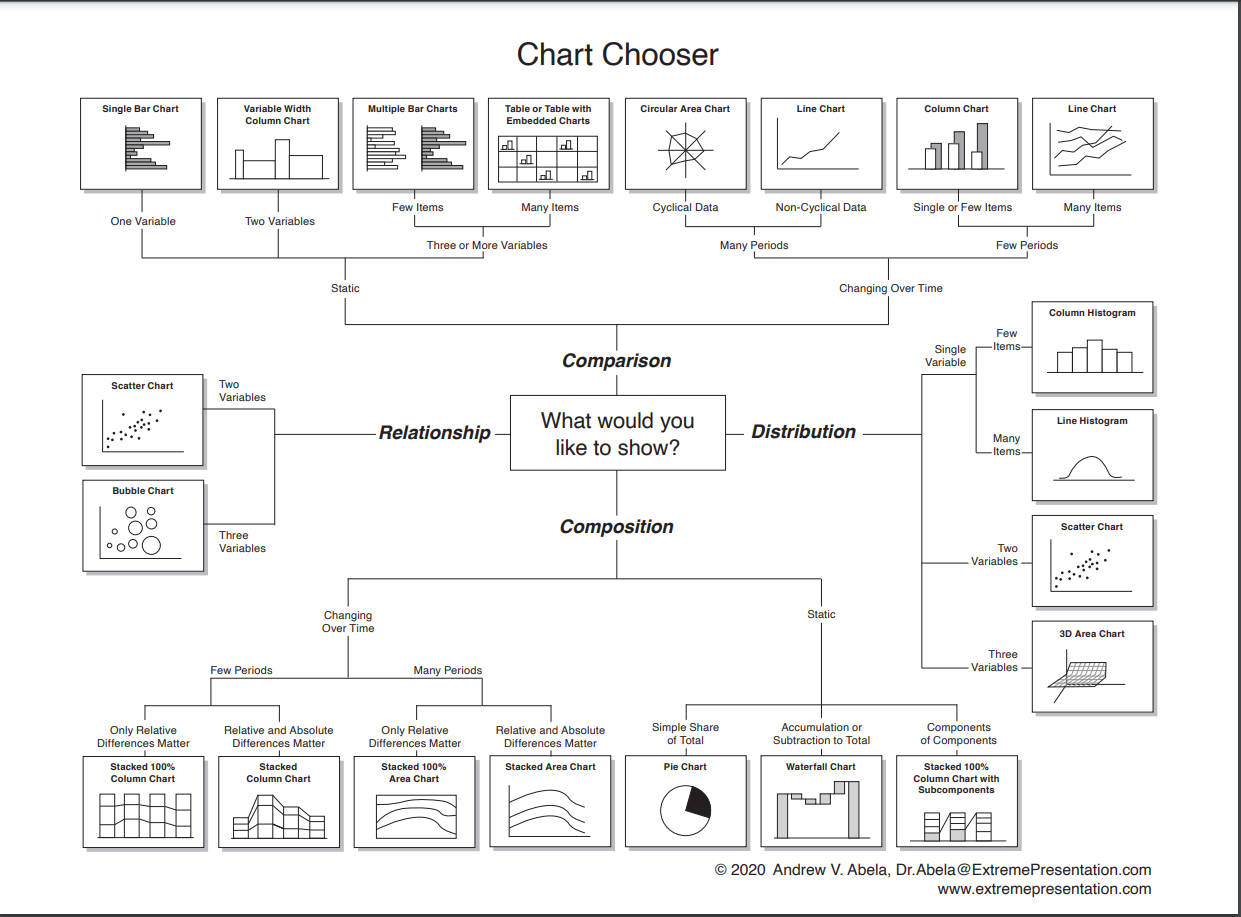

Zum Beginn der graphischen Analyse filtern wir die relevanten Spalten für die weiteren Analysen. Wir nehmen Features raus, die sehr viele Nullen hatten oder für die weitere Analyse nicht relevant scheinen und zwar:
* Name
* Ticket
* Cabin
* HomeDestination

Wir speichern diesen reduzierten Datensatz in einem neuen Dataframe. Somit können wir, wenn etwas schiefgeht, wieder vom alten, ursprünglichen Dataframe aus anfangen.

In [22]:
# Befehl sagt: speichere aus dem Titanic Dataframe eine Untermenge in den neuen Dataframe titanic_plot_df und nehme nur die aufgeführten Spalten
titantic_plot_df = titanic_df[['age','fare','survived','SiblingSpousesPresent','ParentsChildrenPresent','PassengerClass', 'AgeGroup', 'embarked', 'sex']] 

#### Univariate Analysen

Fangen wir mit einfachen univariaten Analysen an. Wir schauen uns an:
* wie viele Frauen und Männer waren an Bord?
* wie viele Frauen und Männer haben überlebt?
* welche Altersgruppen gab es an Bord?

Wir schauen uns dies in verschiedenen Visualisierungsformen an.

Einfache Darstellungsmöglichkeiten:
* Countplot = zeichnet Darstellung mit absoluten Zahlen (zählt die einzelnen Elemente)
* Histplot = zeichnet eine Verteilung von diskreten Werten
* displot = zeichnet Verteilung von sowohl diskreten als auch kontinuierlichen Werten
* Multiplot = zeichnet mehere Graphen nebeneinander

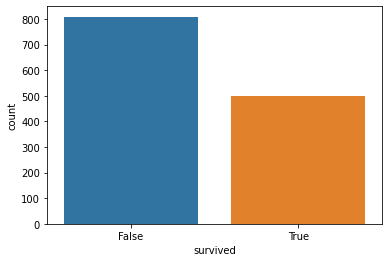

In [23]:
ax = sns.countplot(x="survived", data=titantic_plot_df) # der Wert von x ist der Name der Spalte aus dem Dataset.

Die Graphik zeigt, daß weitaus mehr gestorben sind als überlebt haben. Oder in Prozent:

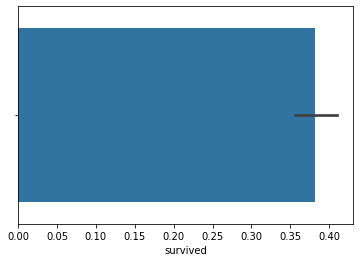

In [37]:
ax = sns.barplot(x="survived", data=titantic_plot_df) 

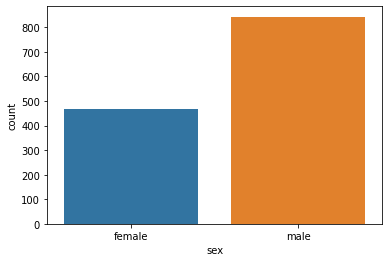

In [24]:
ax = sns.countplot(x="sex", data=titantic_plot_df)

Und mehr Männer als Frauen waren an Bord.

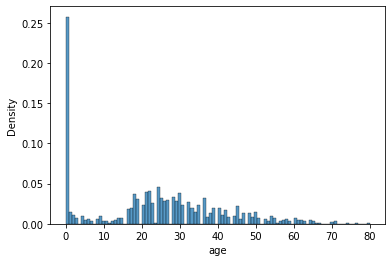

In [ ]:
# der Wert von x ist der Name der Spalte aus dem Dataset. Bins sagt, in wie viele Körbe wir die Ergebnisse einteilen wollen. 
ax = sns.histplot(x="age", 
                  data=titantic_plot_df, 
                  stat='density', 
                  bins=100) 

Zum Vergleich: die Altersverteilung ohne die 0 Jahreswerte. Wir "diskretisieren" die Altersverteilung, indem wir die ganzen verschiedenen Alter in 23 Körbe (bins) einteilen. Das heißt, alle verschiedenen Alterswerte werden hier in genau 23 Körbe eingetragen. Dadurch wird die Ereignismenge aus den verschiedensten Alterswerten in genau 23 abzählbare, endliche Werte reduziert (daher das Wort "diskret").

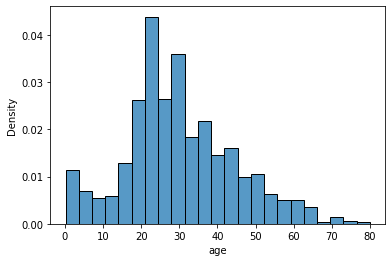

In [ ]:
titanic_age_distribution = titantic_plot_df['age'] # speichere alle Alterswerte in einem neuen Dataframe
titanic_age_distribution = titanic_age_distribution[titanic_age_distribution != 0] # behalte alle Alterswerte ungleich 0

ax = sns.histplot(data=titanic_age_distribution, stat='density', bins=23) # und stelle die als Dichteverteilung mit 23 Körben dar

Die Graphik zeigt daß ungefähr 0,01% in einem der ersten Körbe eingeteilt wurden. Wir können auch die einzelnen Körbe miteinander addieren und wüssten so, daß das Zusammenlegen der Körbe bis 40 Jahre 75% der Passagiere der Titanic abdeckt. 

Oft ist uns eine Einteilung in Körbe zu ungenau (obwohl Seaborn automatisch eine relativ gute Anzahl Körbe berechnet bzw. wir diese frei konfigurieren können), wir möchten bspw. das genaue Verhalten sehen. Dafür stellen wir die Altersverteilung als kontinuerliche Verteilung dar. Im ersten Schritt erweitern wir die bestehende Graphik um den Parameter KDE, der die blaue Kurve hinzufügt.

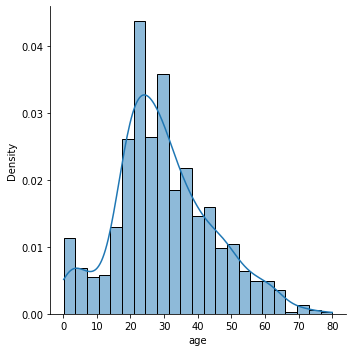

In [ ]:
ax = sns.displot(data=titanic_age_distribution, stat='density', kde=True, kde_kws={})

Die blaue Kurve verbindet alle einzelnen Alterswerte in den Körben miteinander, indem quasi "unendlich" viele einzelne Körben eingesetzt werden. Da somit der Übergang zwischen einzelnen Körben ganz, ganz gering ist, kann man sich das als lückenloser, kontinuerlicher Übergang von Korb zu Korb vorstellen (wie die Infinitesimalrechnung in der Schule...)

Deshalb spricht man von einer kontinuierlichen oder auch stetigen Verteilung, die wir uns in der nächsten Abbildung anschauen.

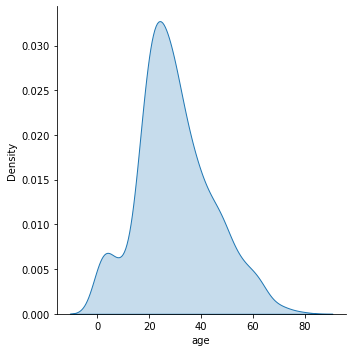

In [ ]:
ax = sns.displot(titanic_age_distribution, kind="kde", fill=True)

Anhand der Verteilung sehen wir einfacher als anhand der vorigen Abbildung, daß wir beim Alter 40 deutlich mehr als die Hälfte aller Passagiere abgedeckt haben; also daß deutlich mehr als die Hälfte der Titanicpassagiere jünger oder gleich 40 Jahre ist.

Nachdem wir jetzt 3 Werte einzeln verglichen haben, wollen wir auch die anderen Werte vergleichen. Um die Werte miteinander einfach vergleichen zu können, legen wir mehrere Auswertungen nebeneinander.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


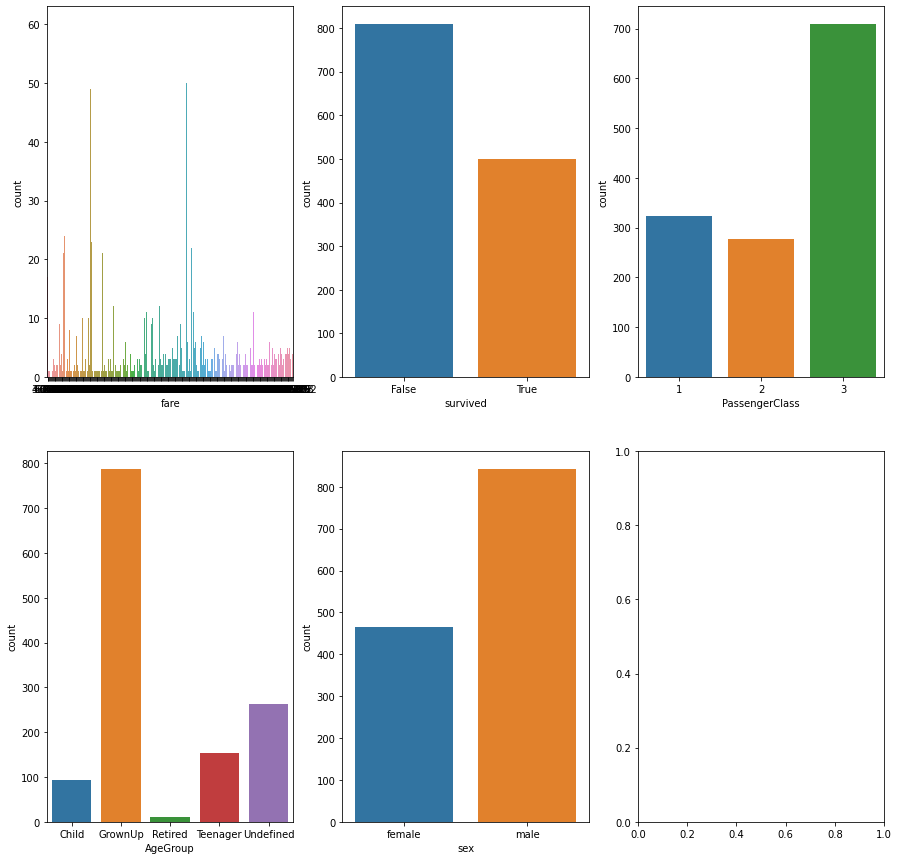

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,15))  # Befehl sagt: mach einen großen Plot mit 2 Zeilen mit jeweils 3 Subplots und Gesamtgröße 15x15.

columns = ['fare','survived','PassengerClass', 'AgeGroup', 'sex'] # wir wollen uns diese Werte nur anscuaen

for i, column in enumerate(titantic_plot_df[columns]):
    sns.countplot(titantic_plot_df[column], ax=axes[i//3,i%3])

#### Multivariate Analysen

Nachdem wir jetzt alle Variablen einzeln analysiert haben, wollen wir jetzt die Variablen miteinander in Kombination setzen, also eine multivariate Analysen durchführen.

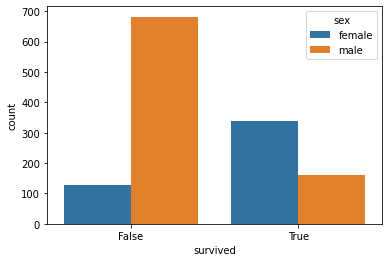

In [ ]:
# wir kombinieren die beiden Graphiken und wollen eine Detaillierung der Überlebenden nach Geschlecht haben.
ax = sns.countplot(x="survived", hue='sex', data=titanic_df)  

Wir sehen anhand der Graphik sofort, daß obwohl es deutlich mehr Männer als Frauen insgesamt gab, deutlich mehr Frauen überlebt haben.

Bis jetzt haben wir uns immer Ganzzahlen angesehen, jetzt fügen wir Prozentzahlen hinzu.

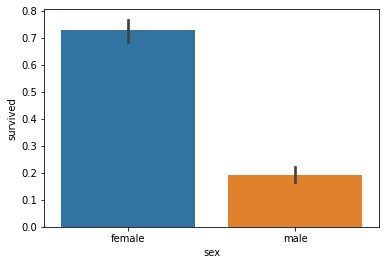

In [ ]:
ax = sns.barplot(x = "sex", # Variable für x-Achse
                 y = "survived",  # Variable für y-Achse
                 data=titantic_plot_df, # aus welchem Datensatz
                 order = ['female','male']) # welcher Wert von x wird zuerst angezeigt

Die Graphik zeigt, daß deutlich mehr Frauen überlebt haben und zwar sowohl prozentual als auch gesamthaft.

Wir können auch 3 Features gleichzeitig vergleichen, beispielsweise um zu untersuchen, ob das Überleben mehr von Geschlecht oder Passagierklasse abhängt. Um aber eine genauere Aussage treffen zu können, wollen wir sowohl Geschlecht als auch Passagierklasse als Attribut in beiden Auswertungen haben.

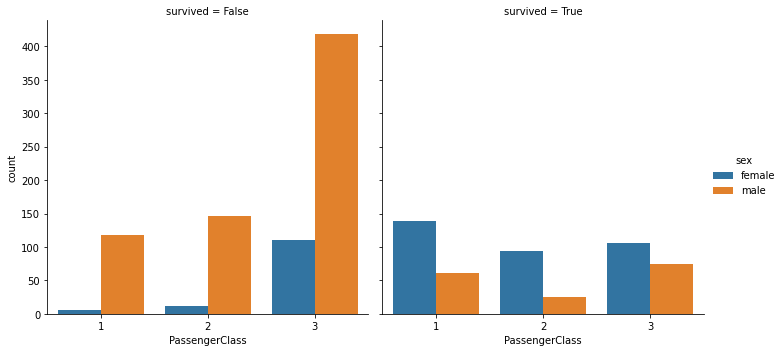

In [ ]:
g = sns.catplot(x = "PassengerClass", 
                hue = "sex", 
                col = "survived", 
                data = titanic_df, 
                kind = "count")

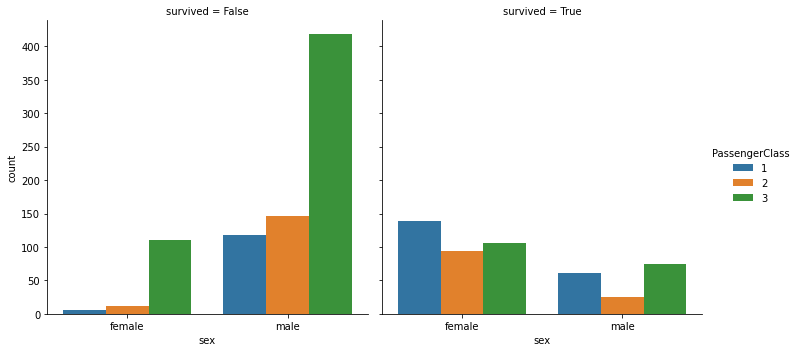

In [ ]:
g = sns.catplot(x = "sex", 
                hue = "PassengerClass", 
                col = "survived", 
                data = titantic_plot_df, 
                kind = "count")

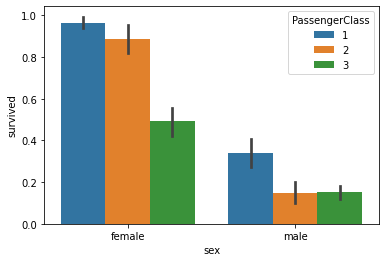

In [ ]:
sns.barplot(x = "sex", 
            hue = 'PassengerClass',
            y = "survived", 
            data = titantic_plot_df
            )

Aus den 3 Graphiken gewinnen wir die folgende Aussagen:
* Frauen haben deutlich eher überlebt: es sind kaum Frauen aus der 1. oder 2. Klasse gestorben. Selbst in der 3. Klasse sind weniger Frauen gestorben als Männer in der ersten Klasse! 
* Es haben mehr Männer in der 3. Klasse überlebt als in anderen Klassen. Aber das liegt daran dass mehr Männer an Bord waren. Prozentual gesehen haben Männer in der zweiten Klasse genauso hohe Chancen zu überleben gehabt wie in der ersten. Leo hätte also lieber in der zweiten Klasse fahren sollen! Oder gleich in der ersten Klasse, da hätte er eine doppelt so hohe Überlebenschance gehabt. 

Die Graphik zeigt daß ca. ein Großteil der Männer aus der dritten Klasse nicht überlebt haben, aber die Überlebenschancen auch für Männer in der zweiten und dritten Klasse nicht besser waren. 

Frauen aus der ersten und zweiten Klasse haben fast vollständig überlebt, bei Frauen aus der 3. Klasse war die Chance zu überleben ca. 50%.

Man könnte jetzt noch vergleichen, ob bei den überlebenden Männern das Alter einen entscheidendenden Faktor bietet

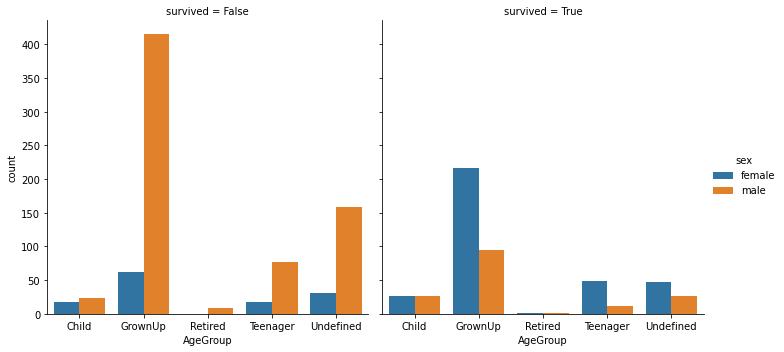

In [ ]:
g = sns.catplot(x="AgeGroup", 
                hue="sex", 
                col="survived",
                data=titanic_df, 
                kind="count")

Man sieht daß bei Männern nur Kinder (ca. 40) und Erwachsene (ca.100) in absoluten Zahlen überlebt haben, aber prozentual scheinen nur bei den männlichen Kindern höhere Chancen gegeben zu haben. 

Aber schauen wir es uns im Detail nochmals an.

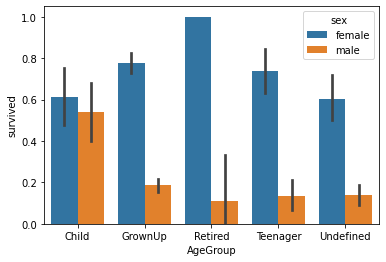

In [ ]:
sns.barplot(x = "AgeGroup", 
            hue = 'sex',
            y = "survived", 
            data = titantic_plot_df)

Man sieht deutlich daß nur männliche Kinder eine bessere Überlebenschance hatten, aber auch hier weniger als 50%!!

Gibt es Unterschiede zwischen den Passagierklassen? Also hat ein Passagier in der zweiten Klasse höhere Chancen zu überleben als in der ersten oder der dritten?

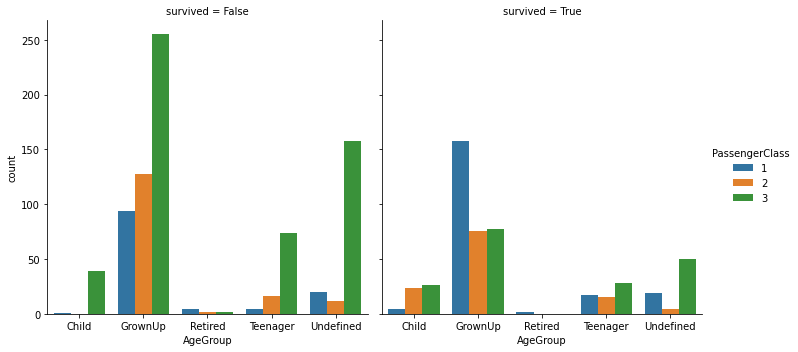

In [ ]:
g = sns.catplot(x = "AgeGroup", 
                hue = "PassengerClass", 
                col = "survived",
                data = titanic_df, 
                kind = "count")

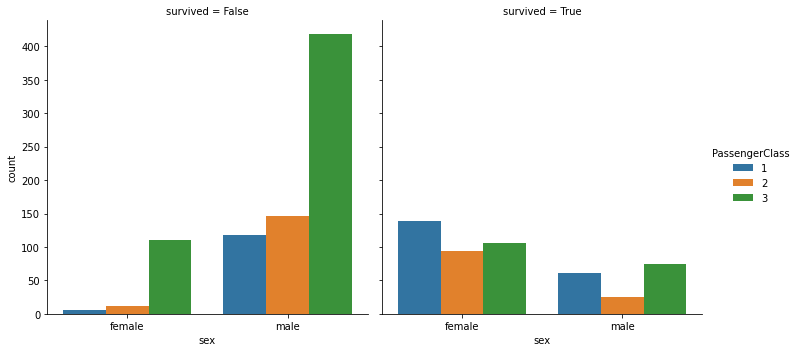

In [ ]:
g = sns.catplot(x = "sex", 
                hue = "PassengerClass", 
                col = "survived",
                data = titanic_df, 
                kind = "count")

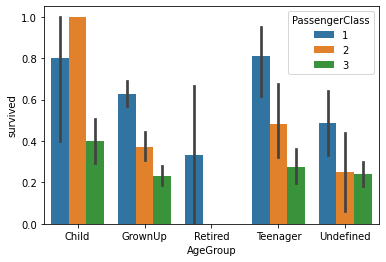

In [ ]:
sns.barplot(x = "AgeGroup", 
            hue= 'PassengerClass',
            y = "survived", 
            data = titantic_plot_df)

Die drei Graphiken zeigen, daß
* Kinder in der ersten und zweiten Klasse mit 80% bzw. 100% gerettet wurden und in der 3. Klasse weniger als die Hälfte.
* die meisten Toten Erwachsene in der 3. Klasse waren.
* die meisten Überlebenden aus der 1. Klasse Erwachsene waren.
* Prozentual gesehen die meisten Kinder und Teeenager aus der 1. Klasse gerettet wurden.
* von vielen Toten nicht mehr sagen können, da wir keine Daten haben (undefined Age).

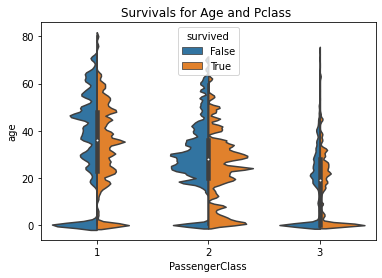

In [ ]:
g= sns.violinplot(x="PassengerClass", y="age", hue='survived', data=titantic_plot_df, split=True, bw=0.05)
plt.title('Survivals for Age and Pclass ')
plt.show()

Der Ausschlag bei 0 ist für die Leute ohne Alter, denen wir das generische Alter 0 gegeben haben.

Wir wollen jetzt untersuchen, ob der Ticketpreis oder das Alter Einfluß aufs Überleben hatten. Sowohl der Ticketpreis als auch das Alter sind kontinuierliche Variablen. Kontinuierliche Variablen unterscheiden sich von diskreten Variablen dadurch, daß sie einen viel höheren und unterbrechungsfreien, also kontinuierlichen, Wertebereich haben. Ein Beispiel hierfür sind Geldbeträge mit Nachkommastellen (kont. Variable).

Wir nehmen eine weitere Darstellung, den sogenannten Scatterplot, um die Verteilung von Alter und Fahrpreis aufzuzeichnen inkl. farblicher Unterscheidung Überleben.

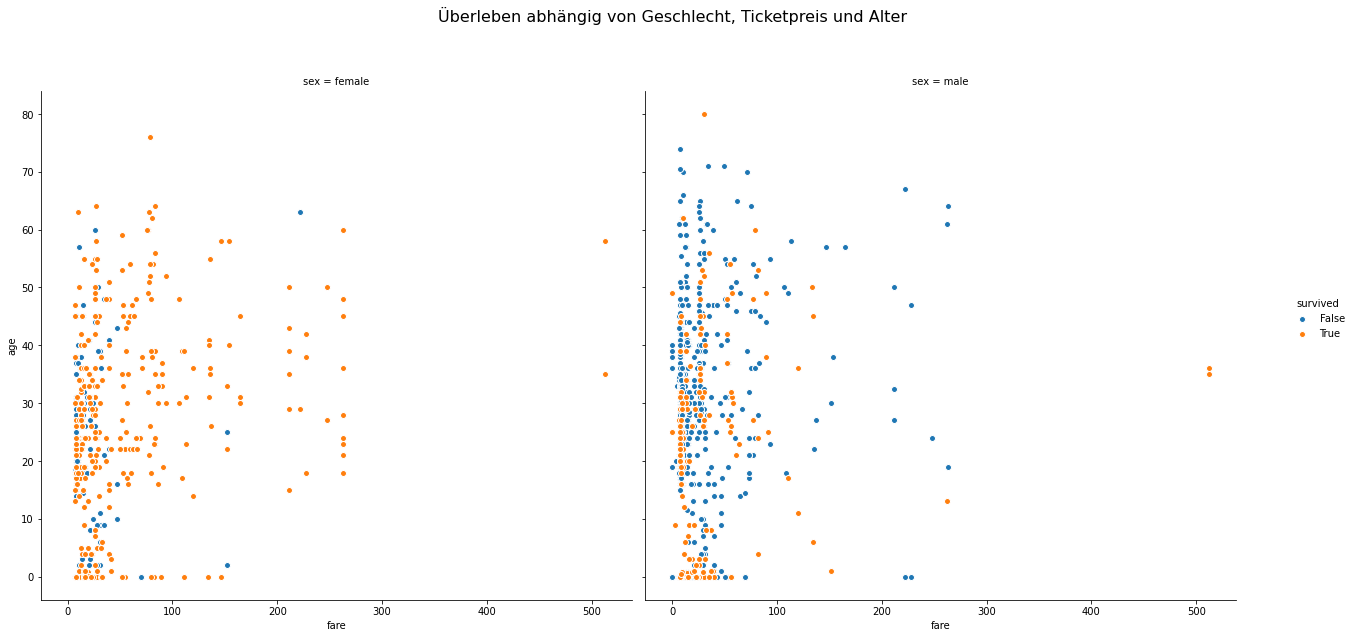

In [ ]:
g = sns.FacetGrid(titantic_plot_df, 
                  height = 9,  # wie groß soll die Abbildung sein
                  hue = "survived", 
                  col = "sex", 
                  margin_titles = True)

g.map(plt.scatter, 
      "fare", 
      "age",
      edgecolor = "w").add_legend()

g.fig.suptitle("Überleben abhängig von Geschlecht, Ticketpreis und Alter", size = 16)
plt.subplots_adjust(top=0.85)

Die Graphik zeigt, daß die meisten Ticketpreise der Männer im Bereich um 100 Pfund liegen und daß die meisten Toten solch ein Ticket hatten.

Die Graphik zeigt aber auch, daß Frauen eine größere Verteilung/ Spread beim Ticketpreis hatten. Das legt die Vermutung nahe, daß Frauen im Mittel mehr fürs Ticket gezahlt haben. Das untersuchen wir weiter.

In [ ]:
# wir filtern das Dataframe auf Männer und Fare und rechnen den Durchschnittswert. Den vergleichen wir dann mit dem Wert für Frauen und Ticketpreis.
print("Average Fare for all passengers", titantic_plot_df['fare'].mean()) # nehme die Spalte Fare und berechne den Durchschnitt hierfür.

print("Fare for specific:", titantic_plot_df.groupby('sex').fare.mean()) # bisschen komplizierter: gruppiere Dataset nach Mann und Frau und berechne für beide Gruppen den jeweiligen durchschnittlichen Ticketpreis

Average Fare for all passengers 33.29547928134572
Fare for specific: sex
female    46.198097
male      26.154601
Name: fare, dtype: float64


Frauen haben also im Durchschnitt mehr für ihr Ticket bezahlt, dafür aber mit deutlich höherer Wahrscheinlichkeit überlebt...

Nachdem wir recht viel einzelne Auswertungen gemacht haben, hier eine einfache Darstellung wie die Variable miteinander korrelieren bezüglich Überlebensrate.

<Figure size 432x288 with 0 Axes>

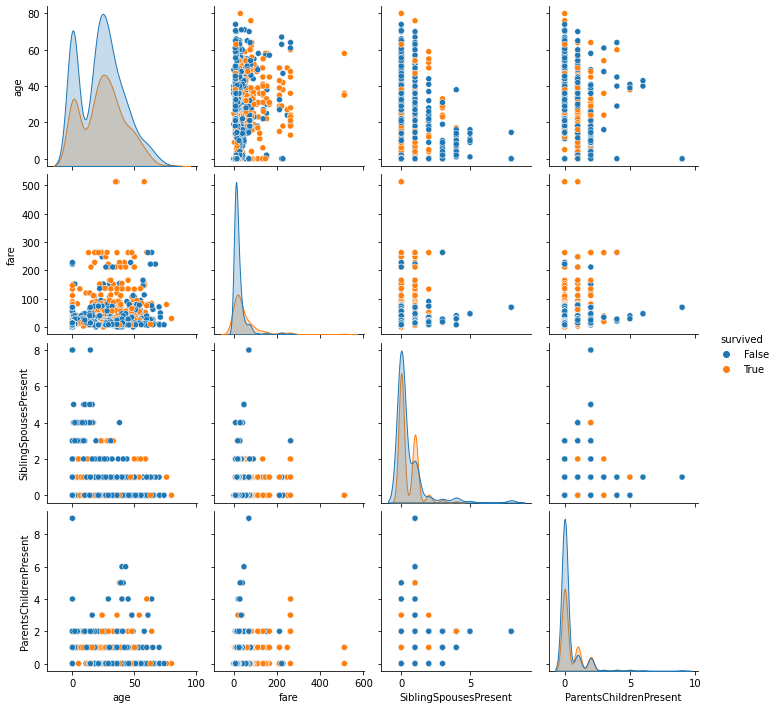

In [ ]:
plt.figure()
sns.pairplot(data=titantic_plot_df, hue='survived') 

Wir sehen auf einen Blick, daß
* in der 3. Klasse die meisten Leute starben, dies also ein schlechter Indikator für das Überleben ist (rechts unten).
* ParentsChildrenPresent in der vorletzten Zeile, 4. Bild von links, für den Wert 0, also Alleinreisende, ein guter Indikator für Überleben ist.
* Der Passagier mit dem höchsten Ticketpreis nicht überlebt hat. Dieser Wert liegt aber so weit abseits von den anderen Werten, daß er statistische Aussagen verzerrt. Man nennt solche Werte auch **Outlier**.
* Alter an sich kein guter Indiktor für Überleben ist (1. Zeile, erster Wert), aber in Kombination mit Passagierklasse.

## Schritt 4: Model the Data

In diesem Abschnitt wollen wir versuchen, die Zusammenhänge der Daten mit- und untereinander zu modellieren. Das heißt, wir versuchen, mathematische Formeln zu finden, mit denen sich die Zusammenhänge zwischen den Variablen bilden lassen.

Was bringt uns das?
* Entdecken von Zusammenhängen und Gesetzesmäßigkeiten (das schauen wir uns an).
* Vorhersage von Werten gegeben ein Wert (das schauen wir uns an).
* Fortgeschritten: wir können die Daten deutlich komprimieren. Wenn wir bspw. für einen Datensatz wissen, daß es einen direkten Zusammenhang zwischen Alter und Ticketpreis gibt, brauchen wir nicht die einzelnen Datenpunkte speichern, sondern nur die Formel für den Zusammenhang. Das wird besonders für enorme Datensätze von mehreren Millionen Daten sehr interessant. Dies ist weniger aus Sicht Speicherplatz relevant, sondern wir brauchen nicht lange nach Werten suchen- wir berechnen den Wert.

Wir machen hier nur einen groben Einblick in Machine Learning. Detaillierter schauen wir uns das in den späteren Vorlesungen an. Probieren Sie doch die später gelernten Verfahren dann selbstständig aus!


### 1. Decision Tree

#### Datenaufbereitung
In diesem Abschnitt schauen wir uns einen Entscheidungsbaum. Eine genauere Dokumentation inklusive aller möglichen Paramater findet man unter: [Link](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

Bevor wir Machine Learning Modelle nutzen können, müssen wir ein bißchen Data Engineering machen. Nicht ganz so viel wie vorher, aber wir müssen/ sollten folgendes machen:
* Kategorische Variablen in Integer-Typen umwandeln.
* das vorherzusagende Label aus dem Ausgangs-Dataframe in einen Vektor y zu speichern und aus dem Ausgangs-Dataframe entfernen (Entfernen wir die zu vorhersagenden Daten nicht aus den Ausgangsdaten, lernen wir nicht richtig die Zusammenhänge).
* alle Features in eine große Matrix X abspeichern.
* ggf. bei Features mit hohem, streuenden Wertebereich die Werte normieren (Normieren bedeutet, daß wir die Gesetzesmäßigkeiten in den Daten beibehalten, aber keine große Spreizung der Werte haben). Ein Beispiel hierfür ist der Ticketpreis, bei dem wir vorher gesehen haben, daß dieser Wert eine enorm hohe Spannbreite hat. Das Normieren schauen wir uns aber in der Vorlesung noch genauer an und machen das hier nicht im Rahmen dieses Notebooks.

Das heißt für unser Fallbeispiel, wir teilen alle Passagiere der Titanic in die Matrix $X$ und einen Vektor $y$ auf. In der Matrix $X$ finden sich Zeile für Zeile alle Daten jedes individuellen Passagiers, in $y$ finden wir ob dieser jeweilige Passagier überlebt hat oder nicht. Damit ist klar, daß jeder Passagier den gleichen Index in der Matrix $X$ für seine Eigenschaften als auch im Vektor $y$ für sein Überleben haben muß. Heißt, in Zeile 0 der Matrix $X$ finden sich die Werte des ersten Passagiers, in Zeile 0 von $y$ findet sich ob dieser Passagier überlebt hat.

ACHTUNG: wie schon gesagt aufgrund der fehlenden Normierung des Features **Fare** sind die Ergebnisse verzogen, dem Feature wird später (zu) viel Gewicht für Bestimmen Überleben zugerechnet.


#### Training des Algorithmus und Optimierung
Nach dieser Aufteilung spalten wir die X-Matrix als auch den y-Vektor in ein Trainings- und ein Test-Set auf. Die Einteilung erfolgt zufällig, die Größe von Trainings- und Testmenge ist per Parameter steuerbar. 

Mit dem Trainingsdaten wird das Model trainiert. Trainieren bedeutet, daß für jede Zeile des Datensets, also für jeden individuellen Passagier $P_i$ mit seinen spezifischen einzelnen j Features $X_{i_j}$ eine Gleichung aufgestellt wird um den Zielwert vorhersagen zu können.

Nach dem Training wird das trainierte Modell auf die Test-Daten angewandt, die das Modell noch nicht gesehen hat. An diesen Daten kann man dann bewerten, wie gut das Modell wirklich ist, also wie gut das Modell gelernt hat, zu generalisieren.

Man bildet hier zuerst eine **Baseline** für die Genauigkeit. Oft wird hierzu die Genauigkeit genommen, mit der ein Mensch die gleiche Aufgabe verrichten würden. 

Von diesem Wert abgesprungen, schaut man sich dann die Trainings- und Testgenauigkeit an. Beide sollten höher sein als die Baseline.

Paßt das Modell nun deutlich besser auf die Trainings- als auf die Testdaten (d.h. höhere Trainingsgenauigkeit als Testgenauigkeit), spricht man von **overfitting**.
War der Algorithmus hingegen nicht in der Lage, aus den Trainingsdaten die generischen Muster zu lernen (bspw. zu wenige oder fehlerhafte) Trainingsdaten, dann spricht man von **underfitting**.

Um sich das leichter zu merken, denken Sie an das Vorlesungsbeispiel von der Vorbereitung auf den Führerschein: wenn Sie immer nur die gleichen Testbögen machen, haben Sie diese perfekt drauf; falls dann in der Prüfung neue Bögen drankommen, haben Sie ggf. ein Problem :-( (Overfitting).
Wenn Sie zu wenige Trainingsbögen hatten, dann können Sie sich nicht auf alle Fragen vorbereiten, weil Sie diese schlicht nicht kannten (Underfitting).

Erst importieren wir die Standardbibliotheken, die wir brauchen

In [38]:
# SKLearn ist eine Standardbibliothek, die wir in den nächsten Wochen noch sehr häufig sehen werden. 
# SKLearn nimmt uns sehr viel Arbeit ab, wie man gleich sehen wird.
from sklearn.model_selection import train_test_split # Funktion zum Aufteilen in Trainings- und Testmenge
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier

Jetzt löschen wir die Spalten, die wir nicht brauchen. Bspw. weil hier zu viele fehlende Werte vorhanden waren.

In [39]:
X = titanic_df # Speichern des gesamten Datensatzes in X. 
# wir teilen das Dataset der Titanic auf. Spalte survived als Label wird der y-Vector.
y = X['survived'] 
y=y.astype('int') # und zu int konvertiert (mit Boolean Typen kann man nicht richtig rechnen. Aber hier sind nur 0 und 1 als Werte drinnen)

# die restlichen Spalten kommen in Matrix X. Die Kategorischen Variablen wandeln wir aber vorher noch um
# wir löschen einige Spalten, die wir nicht mehr brauchen
X = X.drop(['survived'], axis=1) # target label. deshalb raus aus X.
X = X.drop(['name'], axis=1) # zu viele fehlende Werte, deshalb nicht verwendet.
X = X.drop(['cabin'], axis=1) # nicht eindeutig und zu viele fehlende Werte
X = X.drop(['HomeDestination'], axis=1) # zu viele fehlende Werte
X = X.drop(['body'], axis=1) # ebenso
X = X.drop(['boat'], axis=1) # auch hier
X = X.drop(['ticket'], axis=1) # könnte man nehmen. Aber wir haben oben gesehen, daß hier viel Streuung ist und nicht viel Aussagekraft.

Jetzt wandeln wir die kategorischen Variablen in Zahlen um. 

Wir machen das, weil Machine Learning Algorithmen nur mit Zahlen rechnen können.

Wir hatten diese vorher ja nur umgewandelt gehabt, da wir für Data Science diese kategorischen Variablen schöner darstellen können. 

In [40]:
# wandele die Kategorische Variable Embarked in Integer um. Wäre auch als Dummy gegeangen, aber dann hätten wir 3 zusätzliche Spalten gehabt. Und das kann das Problem underfitting verstärken - mehr dazu in einer späteren Vorlesung.
embarked_mapping = {"Cherbourg": 1, "Queenstown": 2, "Southampton": 3, "UNDEFINED": 0}
X['embarked']= X['embarked'].map(embarked_mapping)
X['embarked'] = X['embarked'].astype('int')

ageGroup_embedding = {'Child':1, 'Teenager': 2, 'GrownUp': 3, 'Retired': 4, 'Undefined': 0}
X['AgeGroup']= X['AgeGroup'].map(ageGroup_embedding)

sex_mapping = {"female": 0, "male": 1}
X['sex']= X['sex'].map(sex_mapping)

X['PassengerClass'] = X['PassengerClass'].astype('int')
X['AgeGroup'] = X['AgeGroup'].astype('int')
X['sex'] = X['sex'].astype('int')
X['fare'] = X['fare'].fillna(0)

ACHTUNG: wir hatten erwähnt, daß wir Fare nicht normalisieren, weil den aktuellen Fokus der Vorlesung überschreitet.

Mit dem u.a. Block können wir Fare normalisieren, aber die Skaliernug wird später in der Vorlesung erklärt.

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scale = StandardScaler().fit(X_scaled[['age', 'fare']])
#X[['age', 'fare']] = scale.transform(X[['age', 'fare']])

In [41]:
# wir droppen Embarked, um die Anzahl Parameter begrenzt zu halten für logistische Regression
X = X.drop(['embarked'], axis=1)

Wir schauen uns die Ergebnisse unserer Transformationen an, bevor wir mit dem Machine Learning starten....

In [42]:
print(X.shape) # wie schaut die Matrix X mit den Eigenschaften aus?
print(y.shape) # und wie der Vektor y mit den Zielwerten?

X.describe(include='all')

(1309, 7)
(1309,)


,PassengerClass,sex,age,SiblingSpousesPresent,ParentsChildrenPresent,fare,AgeGroup
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.644003,23.877517,0.498854,0.385027,33.270043,2.143621
std,0.837836,0.478997,17.590845,1.041658,0.865560,51.747063,1.220054
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,7.000000,0.000000,0.000000,7.895800,1.000000
50%,3.000000,1.000000,24.000000,0.000000,0.000000,14.454200,3.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,3.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,4.000000


X ist nun eine Matrix mit 7 Spalten und 1309 Zeilen, y ist ein Vektor mit 1 Spalte und 1309 Zeilen

##### Variante 1: einfaches Lernen

Wir teilen die gesamte Matrix X und den gesamten Vektor y in jeweils eine Trainingsmenge X und y sowie Testmenge X und y ein. 
Ein oft genutztes Größenverhältnis ist dabei 30% Testdaten zu 70% Trainingsdaten. 

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# normalerweise ist max_iter default-mässig bei 100. Wenn aber Embarked und alle Features hinzugefügt werden, reicht 100 iterationen nicht mehr
Tree_classifier = DecisionTreeClassifier(random_state=0)

Tree_classifier.fit(X_train, y_train) # trainiere das Modell auf den Trainingsdaten

y_pred = Tree_classifier.predict(X_test) # und sage vorher....das wars schon!!

In [44]:
accuracy_score(y_test, y_pred)

0.7480916030534351

Was haben wir hier gemacht?
* Wir haben X und Y in 2 jeweils 2 Untermengen per train_test_split mit Verhältnis 70% Trainings- und 30% Testmenge aufgeteilt.
* Auf der Trainingsmenge trainieren wir durch den Algorithmus ein Modell, d.h. wir passen den Algorithmus so an, daß das Modell auf die Trainingsmenge "paßt" (````Tree_classifier.fit(X_train, y_train)````).
* wir sagen für die Test-Daten, die der Algorithmus bisher nicht gesehen hat, das Ergebnis vorher, d.h. überlebt oder nicht.  (```Tree_classifier.predict(X_test)```)
* wir vergleichen wie gut das Modell ist (```accuracy_score(y_test, y_pred)```). Dies machen wir, indem wir die Vorhersage $y\_pred$ mit dem realen Wert $y\_test$ vergleichen. Das können Sie sich vorstellen, wenn Sie beim Führerscheintestbogen ihre Lösung mit der Musterlösung vergleichen und alle Fehler aufaddieren (hier wird jedoch jeder Treffer addiert da wir prozentuales Verhältnis berechnen). Eine menschliche Baseline haben wir hier nicht.

Diese Schritte sollten Sie verstehen, denn im Prinzip kommen diese bei jedem Machine Learning-Verfahren vor. Das Anwendungsgebiet und der Algorithmus mag sich ändern, die 3 Schritte sind meist gleich!




##### Variante 2: Cross Validation

Cross-Validation funktioniert quasi genauso wie der vorherige Schritt, nur daß wir mehrere Durchläufe machen und dabei jedesmal die Daten zufällig aufteilen, also ähnlich einem Kartenspiel jedesmal gut und zufällig durchmischen. 

Damit erhoffen wir uns eine höhere Genauigkeit.

In [45]:
from sklearn.model_selection import cross_val_score

tree_CVFold_model = DecisionTreeClassifier(random_state=0) 
Cross_Validation_scores = cross_val_score(tree_CVFold_model, X_train, y_train, cv=10, scoring = "accuracy")

print (Cross_Validation_scores)

[0.73913043 0.75       0.68478261 0.77173913 0.80434783 0.68478261
 0.79120879 0.84615385 0.83516484 0.76923077]


##### Modellvalidierung

Nach dem Trainieren untersuchen wir immer, wie gut unser Modell ist. Die Güte des Modells wird mit mehreren Parametern gemessen, die im Folgenden vorgestellt werden.

In [46]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

# wir vergleichen jetzt mal die Ergebnisse miteinander vom normalen Lernen und von Cross-Validation
# "Normales Lernen"
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred)) #Confusion Matrix
# plot_confusion_matrix(logmodel, X_test, y_test)

print(classification_report(y_test,y_pred)) # Print summary report
print('accuracy is ',accuracy_score(y_pred,y_test)) # Print accuracy score

#Cross_Validation
print("Cross-Validation Scores:", Cross_Validation_scores)
print("Cross Validation im Mittel:", Cross_Validation_scores.mean())

Confusion Matrix:
[[205  41]
 [ 58  89]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       246
           1       0.68      0.61      0.64       147

    accuracy                           0.75       393
   macro avg       0.73      0.72      0.72       393
weighted avg       0.74      0.75      0.74       393

accuracy is  0.7480916030534351
Cross-Validation Scores: [0.73913043 0.75       0.68478261 0.77173913 0.80434783 0.68478261
 0.79120879 0.84615385 0.83516484 0.76923077]
Cross Validation im Mittel: 0.7676540850453893


Was sagen uns diese Zahlen?

Beginnend mit der Confusion Matrix:

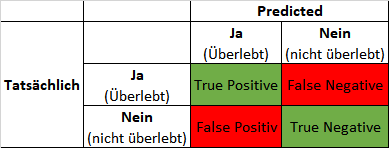

* True positive: Überleben vorhergesagt, Person überlebt.
* True negative: Nicht-überleben vorhergesagt, Person überlebt nicht.
* False positive: Überleben vorhergesagt, Person überlebt nicht.
* False negative: Nicht-überleben vorhergesagt, Person überlebt.

Je besser unser Modell ist, desto höhere Werte haben wir in den grün markierten Zeilen und umso geringere Werte haben wir in den roten Zeilen.

Aus der Matrix abgeleitet sind folgende wichtige Kennzahlen
* Recall: $\frac{TP}{TP+FN}$ = wie viele Elemente korrekt vorhergesagt wurden. Sollte möglichst hoher Wert sein 
* Precision: $\frac{TP}{TP+FP}$ = wie viele von den "wahr" bzw. überlebt vorhergesagten waren wirklich wahr bzw. haben überlebt
* Accuracy: $\frac{TP + FN}{TP+FN+FP+TN}$ = die korrekt vorhergesagten Elemente geteilt durch Gesamtzahl
* F1-Score:$\frac{2*recall*precision}{Recall + Precision}$
* Support: zählt die Anzahl der Elemente je Zeile

Für die Cross-Validierung haben wir folgende Werte:

In [48]:
# hier die Genauigkeit von der Cross-Validation
print("Scores:", Cross_Validation_scores)
print("Mean:", Cross_Validation_scores.mean())
print("Standard Deviation:", Cross_Validation_scores.std())

Scores: [0.73913043 0.75       0.68478261 0.77173913 0.80434783 0.68478261
 0.79120879 0.84615385 0.83516484 0.76923077]
Mean: 0.7676540850453893
Standard Deviation: 0.05244136797087964


Der Entscheidungsbaum bietet zusätzlich eine graphische Darstellung, wie er zu der Entscheidung kommt, ob jemand überlebt hat. Damit der Baum nicht zu groß wird, trainieren wir extra nochmal den Baum mit einer maximalen Tiefe von 5 Ebenen. 

Dieser $max\_depth$ Parameter ist ein sogenannter Hyperparameter, also ein Parameter der das Modell an sich konfiguriert mit Ziel ein verbessertes Modell zu erhalten. Andere Hyperparameter finden Sie in der Dokumentation.

In [69]:
modified_Tree_classifier = DecisionTreeClassifier(random_state=0, max_depth=5)

modified_Tree_classifier.fit(X_train, y_train) # trainiere das Modell auf den Trainingsdaten

y_pred_mod = modified_Tree_classifier.predict(X_test) # und sage vorher....das wars schon!!

accuracy_score(y_test, y_pred_mod)

0.7989821882951654

Wir sehen, daß die Beschränkung der Tiefe des Baums sich positiv auf die Genauigkeit auswies!

Aber schauen wir uns den Baum jetzt mal graphisch an:

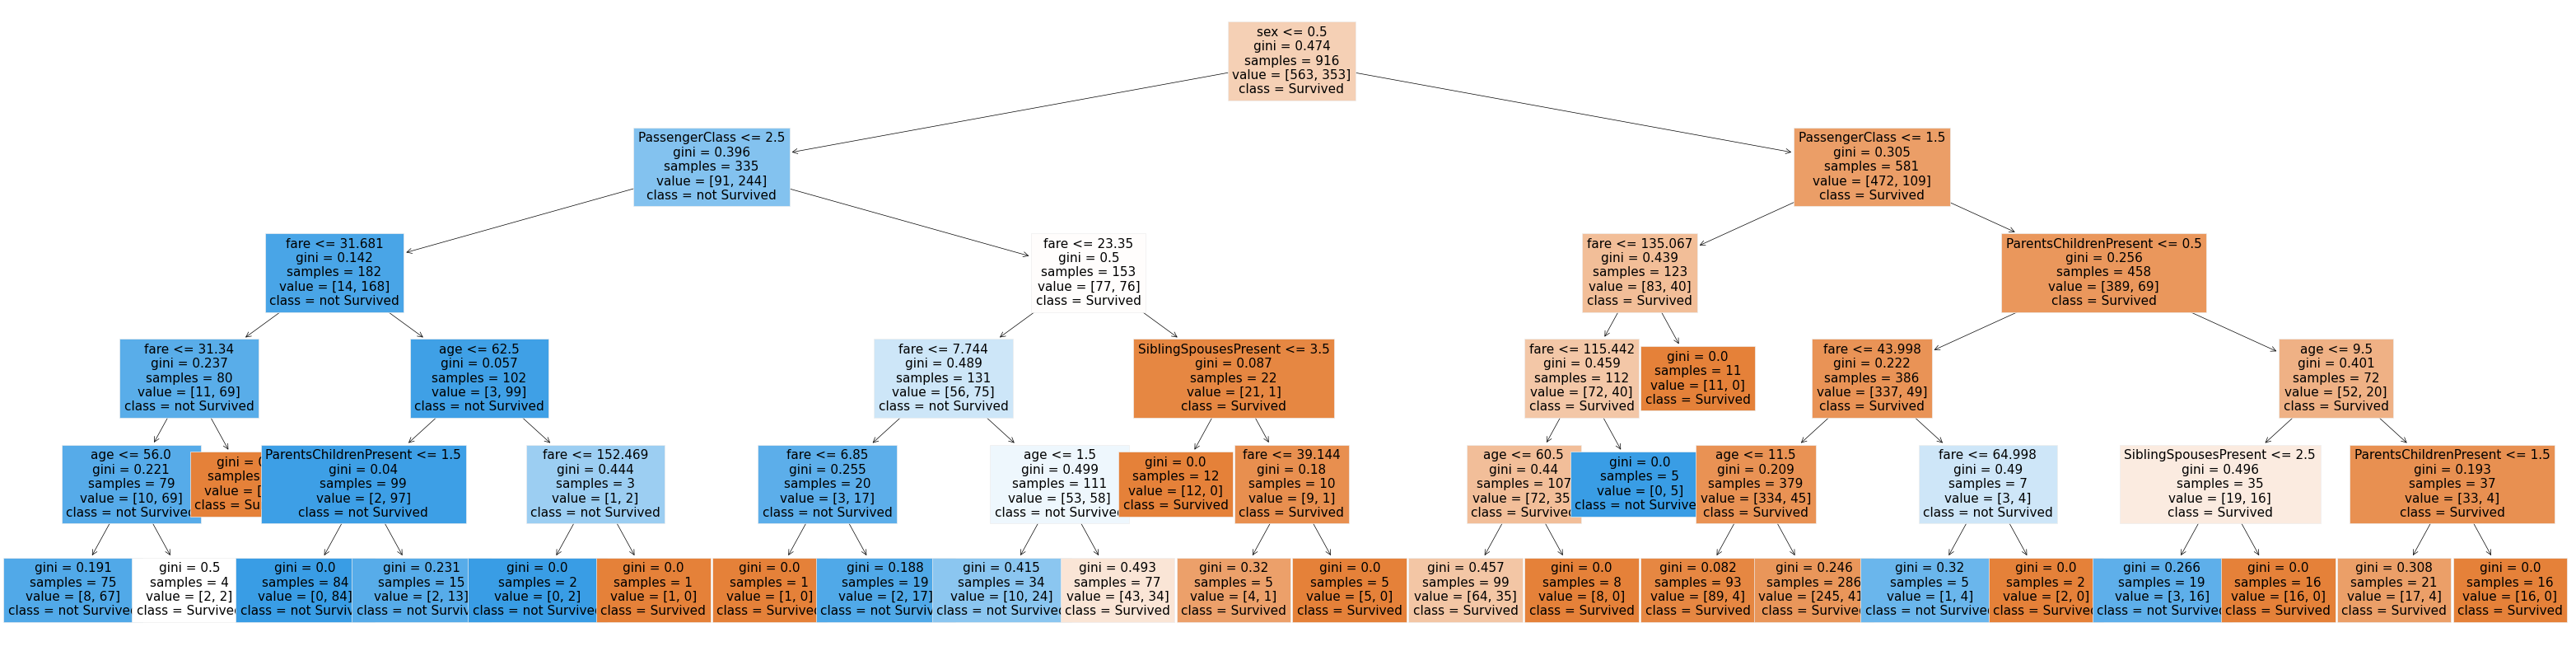

In [63]:
from sklearn import tree
fig = plt.figure(figsize=(40, 10))
# der Aufruf eine Zeile drunter ist ein Fix, damit die Darstellung schöner ist.
_ = tree.plot_tree(modified_Tree_classifier, 
                   feature_names= X.columns.values,  
                   class_names=['Survived','not Survived'],
                   filled=True,
                   fontsize=11)

### 2. Ausblick komplexere Verfahren des maschinellen Lernens

Als Ausblick auf die nächsten Wochen Machine Learning verwenden wir Random Forest, einen weiteren bekannten Algorithmus (Doku unter: [Link](https://https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).)

In [66]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_prediction_RF = random_forest.predict(X_test)

accuracy_score(y_test, y_prediction_RF)

0.806615776081425

Man sieht, daß die Befehle zum initiieren und trainieren quasi genau die gleichen wie bei Linear Regression.

Aber Random Forest hat ein ganz spannendes Zusatz-Feature und zwar die **Feature-Importance**. Das heißt, es gibt eine Gewichtung an, welches Feature welchen gewichteten Beitrag für das Label erreicht. Heißt, wir sehen welche Features eher relevant sind.

Dadurch können wir die Fragestellung, welches Feature am meisten Auskunft zum Überleben gibt, relativ einfach beantworten:

In [67]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
fare,0.309
sex,0.264
age,0.225
PassengerClass,0.077
SiblingSpousesPresent,0.050
ParentsChildrenPresent,0.039
AgeGroup,0.036


Wie schon gedacht ist Geschlecht ein guter Indikator fürs Überleben,aber Fare ist nochmal besser und Age folgt direkt danach. Alle anderen Features sind nicht ganz so wichtig.

**ACHTUNG: wie schon gesagt, sind sowohl Feature als auch Age aufgrund der Nicht-Normierung sehr übergewichtet!**

## Schritt 5: Und wie wendet man das an? Oder: was bringt das alles?

Bisher haben wir mit viel Mühe und Aufwand Daten eingelesen, verarbeitet, Data Science durchgeführt und ein Machine Learning trainiert.

Das trainierte Modell können wir nun einsetzen, um Vorhersagen zu treffen.

Wir schauen uns dies genauer an und versuchen den Ausgang des Films Titanic für die 3 Hauptdarsteller vorherzusagen:

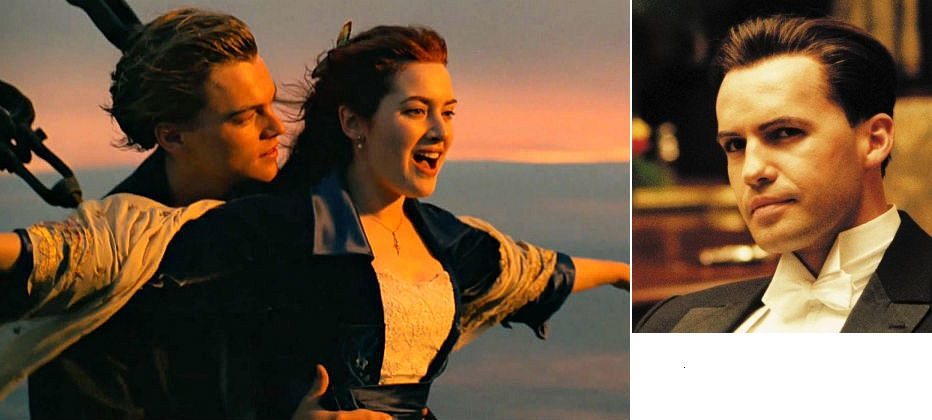

* Kate Winslett als 17 jähriger, weiblicher Passagier in der ersten Klasse, reisend mit ihrer Mutter
* Leonardo di Caprio, 20 Jahre, dritte Klasse, männlich, ohne Geschwister oder Eltern
* Billy Zane, 30 Jahre, erste Klasse, auch ohne Anhang

Dabei stammen die Daten aus der Wikipedia-Seite vom [Film](https://https://en.wikipedia.org/wiki/Titanic_(1997_film)).

Doof ist nur, daß wir bei allen 3 nicht den Ticketpreis wissen (und das Ticketpreis ja wichtiges Feature ist...).

Deshalb nehmen wir mal für 3. Klasse bei Leo, \$15, und für 1. Klasse \$150 bei den beiden anderen an.

In [68]:
# notwendigen Features sind: PassengerClass, Sex (0 Frau, 1 Mann), Age, 
# SiblingSpousesPresent, ParentsChildrenPresent, fare,	AgeGroup
Kate = [[1, 0, 17., 0, 1, 150., 2]]
Leo = [[3, 1, 20., 0, 0, 15., 3]]
Billy = [[1, 1, 30., 0, 0, 150., 3]]

# make a prediction
print("Prädiktion Überlebenschance Kate:", random_forest.predict(Kate))
print("Prädiktion Überlebenschance Leo:", random_forest.predict(Leo))
print("Prädiktion Überlebenschance Billy:", random_forest.predict(Billy))

Prädiktion Überlebenschance Kate: [1]
Prädiktion Überlebenschance Leo: [0]
Prädiktion Überlebenschance Billy: [0]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Unser Random Forest-modell, das eine Genauigkeit von 80% hat, sagt vorher, daß Leo nicht überlebt hätte im Gegensatz zu Kate und Billy.

Für das wichtigste Prädiktionsattribut, den Ticketpreis, hatte ich keine genauen Infos. Kann sein, daß der Ticketpreis im Film vorkam, aber den wollte ich mir (nicht wieder) ansehen. 